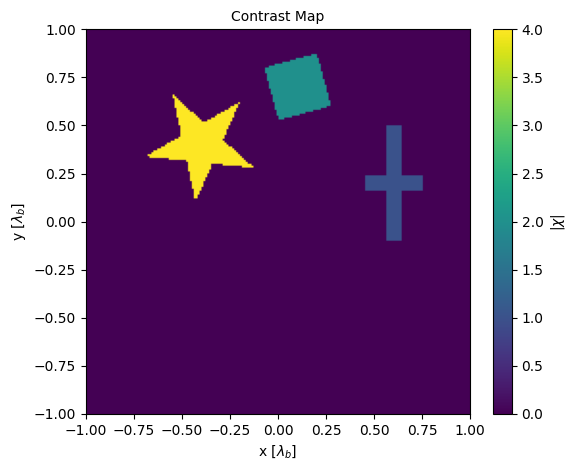

In [27]:
import sys
sys.path.insert(1, '../../../eispy2d/library/')

import configuration as cfg
import inputdata as ipt
import result as rst
import draw
import mom_cg_fft as mom

# Parameters
name = 'multiple'
NM = NS = 80
Ro = 4.
lambda_b = 1.
epsilon_rb = 1.
Lx = Ly = 2.
E0 = 1.
perfect_dielectric = True
resolution = (200, 200)
noise = 5.
indicators = [rst.SHAPE_ERROR, rst.POSITION_ERROR]
epsilon_rd = [5., 3., 2.]
l = 0.3
position = [.4, -.4]
rotate = 30

config = cfg.Configuration(name=name + '.cfg', number_measurements=NM, 
                           number_sources=NS, observation_radius=Ro, 
                           wavelength=lambda_b,
                           background_permittivity=epsilon_rb,
                           image_size=[Ly, Lx], magnitude=E0,
                           perfect_dielectric=perfect_dielectric)


test = ipt.InputData(name=name + '.ipt', configuration=config, 
                     resolution=resolution, noise=noise, indicators=indicators)

test.rel_permittivity, _ = draw.star5(
    l, axis_length_x=Lx, axis_length_y=Ly, resolution=resolution,
    background_rel_permittivity=epsilon_rb, object_rel_permittivity=epsilon_rd[0],
    center=position, rotate=30.
)

test.rel_permittivity, _ = draw.rhombus(
    l/1.5, l/1.5, axis_length_x=Lx, axis_length_y=Ly, center=[.7, .1],
    background_rel_permittivity=epsilon_rb, object_rel_permittivity=epsilon_rd[1],
    rotate=60, rel_permittivity=test.rel_permittivity
)

test.rel_permittivity, _ = draw.cross(
    2*l, l, l/4, axis_length_x=Lx, axis_length_y=Ly,
    object_rel_permittivity=epsilon_rd[2], center=[.2, 0.6], rotate=0.,
    rel_permittivity=test.rel_permittivity
)

forward = mom.MoM_CG_FFT(tolerance=1e-3, maximum_iterations=5000,
                         parallelization=True)

# _ = forward.solve(test)

# print(test)
test.draw(show=True)